You will solve a case study about an education company whose sales are not meeting their requirements or expectations. So you need to provide them with a solution to raise their sales by building a logistic regression model

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who
are interested in the courses land on their website and browse for courses.

 

The company markets its courses on several websites, search engines, and even social media sometimes. Once these people land on the website, they might browse the courses, fill out a form for the course, or watch some videos. When these people fill out a form with their email address or phone number, they are classified as leads. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some leads get converted into successful sales, while most of the leads do not. The typical lead to successful sale conversion rate at X education is around 30%.

 

Now, although X Education gets a lot of leads, its lead-to-sale conversion rate is destitute. For example, if they acquire 100 leads in a day, only about 30 of them are converted into successful sales. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads.’ If they successfully identify this set of leads, the lead conversion rate would go up as the sales team would now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel.


As you can see, there are a lot of leads generated in the initial stage (the initial pool of leads), but only a few of them come out as paying customers from the bottom (converted leads). In the middle stage (lead nurturing), you need to nurture the potential leads well (i.e., educate the leads about the product, constantly communicate, etc.) to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e., the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance. The customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark estimate of the target lead conversion rate as being around 80%.

 

Data
You were given a "leads" dataset from the past that contained approximately 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on the Website, Total Visits, Last Activity, etc., which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted,’ which tells whether a past lead was converted or not, where 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out is the levels present in the categorical variables. Many of the categorical variables have a level called ‘Select’ which needs to be handled because it is as good as a null value (think why?).

 

Goals of the Case Study
There are quite a few goals for this case study. They are as follows:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads, which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e., most likely to convert, whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company that your model should be able to adjust to if the company’s requirements change in the future, so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it out based on the logistic regression model you got in the first step. Also, make sure you include this in your final PowerPoint presentation, where you’ll make recommendations.

In [410]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Step 1: Read and Understand Data

In [411]:
df = pd.read_csv("Lead Scoring Assignment/Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [412]:
# Looking at the number of rows and columns
df.shape

(9240, 37)

In [413]:
# Looking at the data types of each column and the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [414]:
# looking at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Preparation

#### Data Cleaning

1)Handling the 'Select' level that is present in many of the categorical variables.

We observe that there are 'Select' values in many columns. It may be because the customer did not select any option from the list, hence it shows 'Select.' 'Select' values are as good as NULL. So we can convert these values to null values.

In [415]:
df = df.replace("Select", np.nan)

let's see if the "Select" values were correctly replaced by NaN or not

In [416]:
df.sample(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5503,ef2d6646-7865-46fe-b8e6-6d3f194f39c4,607689,Landing Page Submission,Google,No,No,0,2.0,1371,2.0,...,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,No,SMS Sent
2761,59cdbd28-d8a6-4b86-9709-4d654d1b0dc9,633132,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Modified
8805,45159934-6239-4381-b5cb-dabdbb6f1740,582683,Landing Page Submission,Google,No,No,1,3.0,1516,3.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
3900,eb1af302-abfa-416e-b73e-f554e4147f47,622631,Landing Page Submission,Google,No,No,1,5.0,1761,5.0,...,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
5456,dc54ef9a-7537-41d1-9601-786703449981,608120,Landing Page Submission,Direct Traffic,No,No,1,3.0,256,3.0,...,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,Yes,Modified
2041,6f082167-caf3-4074-b0f8-50f205f7de61,639981,API,Google,No,No,0,4.0,1065,2.0,...,No,NaN,Mumbai,03.Low,02.Medium,12.0,13.0,No,Yes,Email Opened
4587,4742a1d0-4059-4531-b005-7d6d995caa1f,615801,API,Olark Chat,No,No,1,0.0,0,0.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,SMS Sent
1657,8d5d8606-edd3-4ebe-b6dd-dcc0e2e4a430,643173,API,Olark Chat,No,No,0,1.0,216,1.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6149,d4b50859-7a14-41c4-86a0-b90885c8fb70,602634,Lead Add Form,Reference,No,No,1,0.0,0,0.0,...,No,Potential Lead,Thane & Outskirts,NaN,NaN,NaN,NaN,No,No,Email Opened
9187,4f465f71-1946-414e-9716-4847c60606e8,579979,API,Olark Chat,No,No,1,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,16.0,15.0,No,No,SMS Sent


Checking the columns for null values

In [417]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Percentage of Null values in each column

In [418]:
round(df.isnull().sum() / len(df.index) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We see that for some columns we have a high percentage of missing values. We can drop the columns with missing values greater than 30%.

In [419]:
drop_list = ["Lead Quality", "Lead Profile", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score", "How did you hear about X Education", "Tags", "City"]
df.drop(labels=drop_list, axis=1, inplace=True)

Let's see if the columns were dropped

In [420]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Finding Null percentages across columns after removing the missing values

In [421]:
round(df.isnull().sum() / len(df.index) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Now let's Look at each of the columns that have null values

Column 1: "Country"
This Column has 26.63% Missing values

In [422]:
df["Country"].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

Making a custom function to ease the EDA process

In [423]:
def count_plot(x, hue=None):
    plt.figure(figsize=(5, 3), dpi=140)
    if hue is not None:
        sns.countplot(data=df, y=x, hue=hue)
    else:
        sns.countplot(data=df, y=x, orient="y", hue=None)
    plt.show()

In [424]:
def box_plot(x, y=None):
    plt.figure(figsize=(5, 3), dpi=120)
    if y is not None:
        sns.boxplot(data=df, x=x, y=y)
    else:
        sns.boxplot(data=df, x=x, hue=None)
    plt.show()

In [425]:
def hist(x, bins=None):
    plt.figure(figsize=(7,5), dpi=140)
    if bins is not None:
        sns.histplot(data=df, x=x, bins=bins)
    else:
        sns.histplot(data=df, x=x)
    plt.show()

In [426]:
def bar_plot(x, y):
    plt.figure(figsize=(7, 4), dpi=140)
    sns.barplot(x=df[x], y=df[y])
    plt.show()

Column 1: "Country"

According to our analysis "Country" Variable will not be any use to us

In [427]:
df.drop(labels="Country", axis=1, inplace=True)

Column 2: "What is your current occupation"
This column has 29.11% Missing Values

In [428]:
df["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

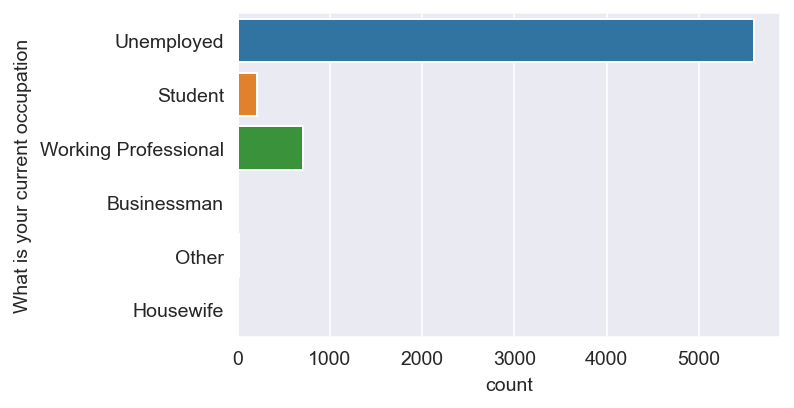

In [429]:
count_plot("What is your current occupation")

Deleting the rows where "What is your current occupation" has missing values

In [430]:
df = df[~pd.isnull(df["What is your current occupation"])]

Column 5: "What matters most to you in choosing a course"
This Column has 29.32% missing values

In [431]:
df["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

We see that this column is highly skewed and hence we remove it

In [432]:
df = df.drop(labels="What matters most to you in choosing a course", axis=1)

Finding the null percentages across columns after imputing the null values

In [433]:
round(df.isnull().sum() / len(df.index) * 100, 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.55
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.98
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.98
Last Activity                                1.57
Specialization                              29.73
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


For specialization, we can impute the missing values by "Not Specified"

In [434]:
df["Specialization"] = df["Specialization"].replace(np.nan, "Not Specified")

In [435]:
round(df.isnull().sum() / len(df.index) * 100, 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.55
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.98
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.98
Last Activity                               1.57
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

Now, we can remove the rows that contain missing values as they are less than 2%

In [436]:
df.dropna(inplace=True)

We can find the percentage of rows retained.

In [437]:
(len(df.index)/9240)*100

69.16666666666667

In [438]:
len(df)

6391

We have retained 69% of the rows after cleaning the data 

### EDA (Exploratory Data Analysis)

Let's look at the columns we are working with again.

In [439]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [440]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


Checking for duplicates

In [441]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


Hence, there are no duplicate values in our dataset

#### Uni variate Analysis and Bi-variate Analysis

Column 1: "Prospect ID"
This column is not of any use for us. Hence, we drop this column

In [442]:
df.drop(labels="Prospect ID", axis=1, inplace=True)

column 2: "Lead Number"

In [443]:
df["Lead Number"].value_counts()

Lead Number
660737    1
600997    1
601038    1
601039    1
601052    1
         ..
629414    1
629447    1
629449    1
629451    1
579533    1
Name: count, Length: 6391, dtype: int64

It looks like "Lead Number" is also a unique identifier, hence it will also be no use to us in our analysis

In [444]:
df.drop(labels="Lead Number", axis=1, inplace=True)

Checking the value counts of each column

In [445]:
cols=list(df.iloc[:,:])


for i in cols:
    print(i,'=====')
    print(df[i].value_counts(), '\n')

Lead Origin =====
Lead Origin
Landing Page Submission    3643
API                        2140
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64 

Lead Source =====
Lead Source
Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64 

Do Not Email =====
Do Not Email
No     5945
Yes     446
Name: count, dtype: int64 

Do Not Call =====
Do Not Call
No     6389
Yes       2
Name: count, dtype: int64 

Converted =====
Converted
0    3326
1    3065
Name: count, dtype: int64 

TotalVisits =====
TotalVisits
0.0      1347
2.0      1227
3.0       940
4.0       825
5.0       578


From the output above, we can see that some columns are highly skewed that means they won't be any use to us. Let's drop these columns.

In [446]:
drop_lst = ["Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]
df.drop(labels=drop_lst, axis=1, inplace=True)

Inspecting the Data Frame again

In [447]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Modified


According to the problem statement, the Target Variable is: "Converted"

Column 3: "Converted"
Data Dictionary: "The target variable. Indicates whether a lead has been successfully converted or not."

Calculating the conversion rate

In [448]:
round((df["Converted"].sum()) / len(df["Converted"].index) * 100, 0)

48.0

The lead conversion rate is 48%.

Converting The column "Converted" into yes and no for the time being to make it more interpretable for the EDA process

In [449]:
df["Converted"] = df["Converted"].replace(1, "Yes").replace(0, "No")

Let's check if the column was converted properly

In [450]:
df["Converted"].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Converted, dtype: object

Column 4: "Lead Origin"

In [451]:
df["Lead Origin"].value_counts()

Lead Origin
Landing Page Submission    3643
API                        2140
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64

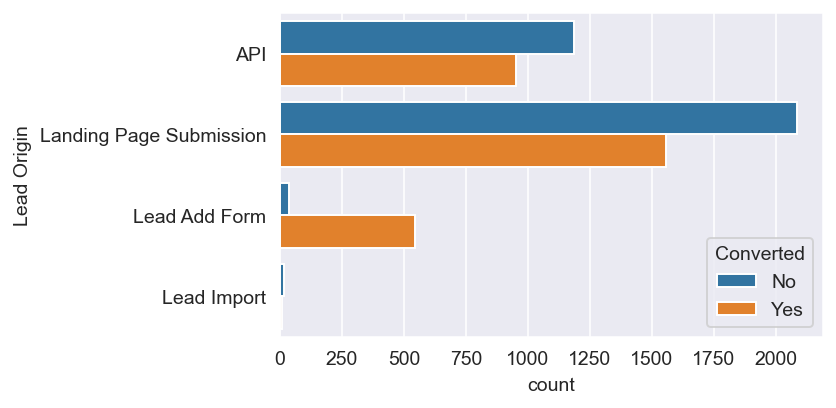

In [452]:
count_plot(x="Lead Origin", hue="Converted")

#### Inferences:

1) API and Landing Page Submission has 42% and 41% conversion rate respectively
2) Lead Add Form has an approx 87% conversion rate 
3) While Lead Import has a Negligible Conversion rate

To improve the overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

Column 5: "Lead Source"

In [453]:
df["Lead Source"].value_counts()

Lead Source
Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64

In [454]:
df["Lead Source"] = df["Lead Source"].replace(["Click2call", "bing", "Social Media", "Live Chat", "Pay per Click Ads", "WeLearn", "testone", "Press_Release"], "Others")

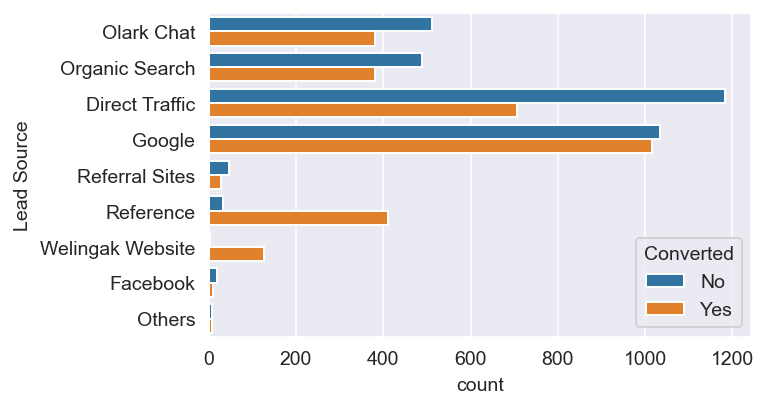

In [455]:
count_plot("Lead Source", hue="Converted")

#### Inferences

From the above plot we can observe:
1) Google and Direct traffic generate maximum number of leads.
2) The Conversion rate of 'Reference' and 'Welingak Website' leads is high.

Column 6: "Do Not Email"

In [456]:
df["Do Not Email"].value_counts()

Do Not Email
No     5945
Yes     446
Name: count, dtype: int64

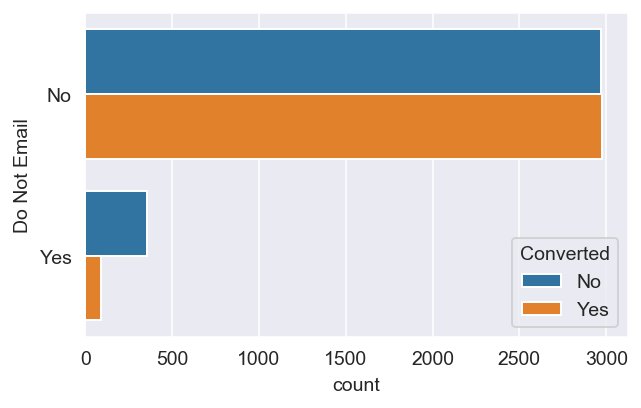

In [457]:
count_plot(x="Do Not Email", hue="Converted")

Observation: People who opted for mail the option is becoming more leads.

Column 7: "Do Not Call"

In [458]:
df["Do Not Call"].value_counts()

Do Not Call
No     6389
Yes       2
Name: count, dtype: int64

We can see that this column is highly skewed, hence we remove this.

In [459]:
df.drop(labels="Do Not Call", axis=1, inplace=True)

Column 8: "Total Visits"

In [460]:
df["TotalVisits"].value_counts()

TotalVisits
0.0      1347
2.0      1227
3.0       940
4.0       825
5.0       578
6.0       337
1.0       270
7.0       225
8.0       163
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0       14
17.0       12
18.0       12
20.0       10
19.0        6
21.0        5
23.0        5
27.0        5
25.0        3
24.0        3
22.0        3
29.0        2
26.0        2
30.0        1
55.0        1
43.0        1
74.0        1
115.0       1
251.0       1
32.0        1
28.0        1
42.0        1
Name: count, dtype: int64

In [461]:
df["TotalVisits"].describe()

count    6391.000000
mean        3.620091
std         5.042908
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

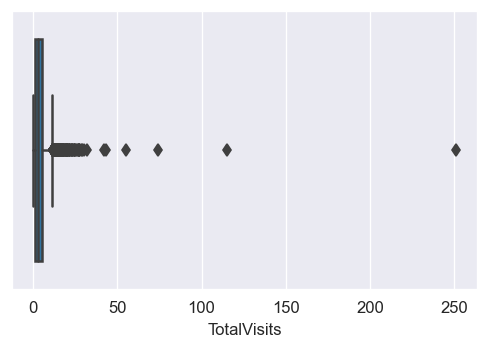

In [462]:
box_plot(x="TotalVisits")

Observation
We can see from the above box plot that only upper range outliers are present in data, so need to treat outliers.

In [463]:
Q3 = df["TotalVisits"].quantile(0.99)
df = df[(df["TotalVisits"] <= Q3)]

Verifying Outliers after removing them

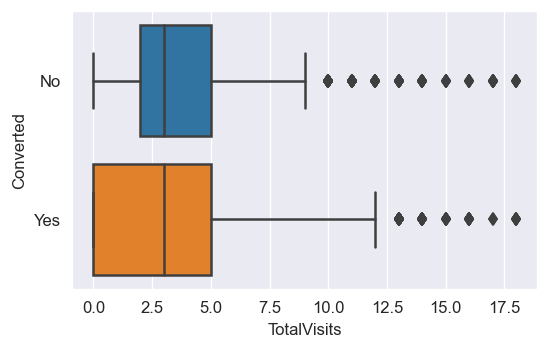

In [464]:
box_plot(x="TotalVisits", y="Converted")

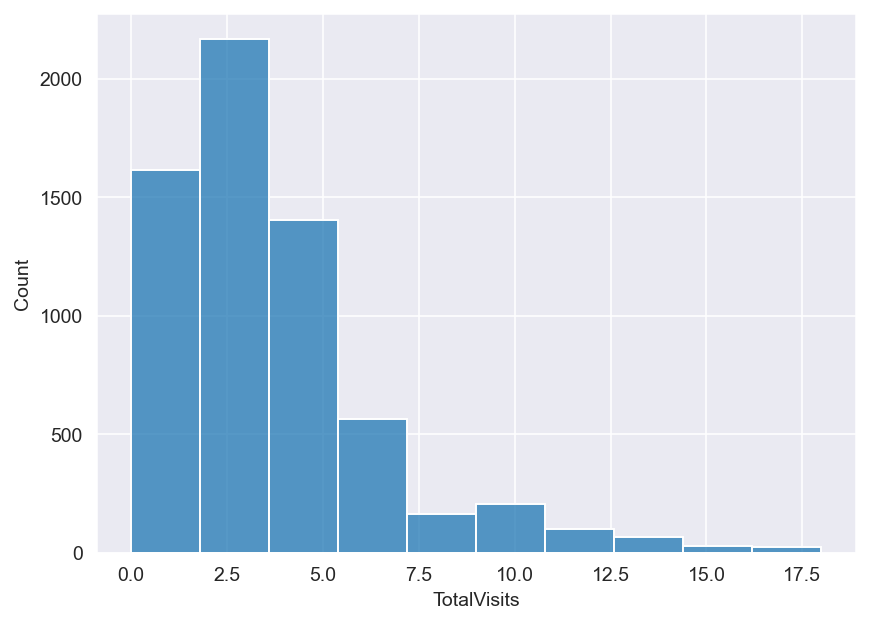

In [465]:
hist("TotalVisits", bins=10)

Column 9: "Total time spent on website"

In [466]:
df["Total Time Spent on Website"].value_counts()

Total Time Spent on Website
0       1351
60        15
127       14
96        13
87        13
        ... 
840        1
1183       1
470        1
817        1
1845       1
Name: count, Length: 1612, dtype: int64

In [467]:
df["Total Time Spent on Website"].describe()

count    6338.000000
mean      533.559009
std       564.654111
min         0.000000
25%        33.000000
50%       285.500000
75%      1020.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

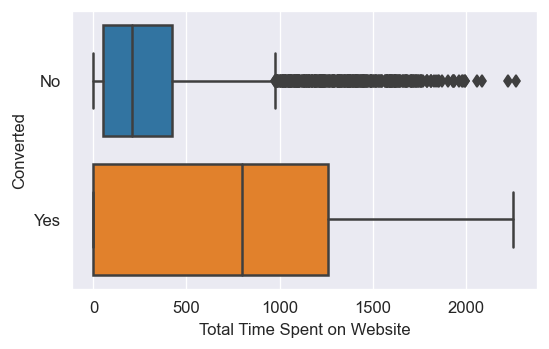

In [468]:
box_plot(x="Total Time Spent on Website", y="Converted")

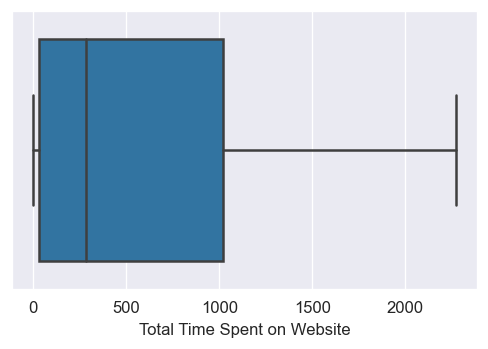

In [469]:
box_plot(x="Total Time Spent on Website")

Observation
From above box plot we can see that there is no outlier in data,so no treatment required for it.

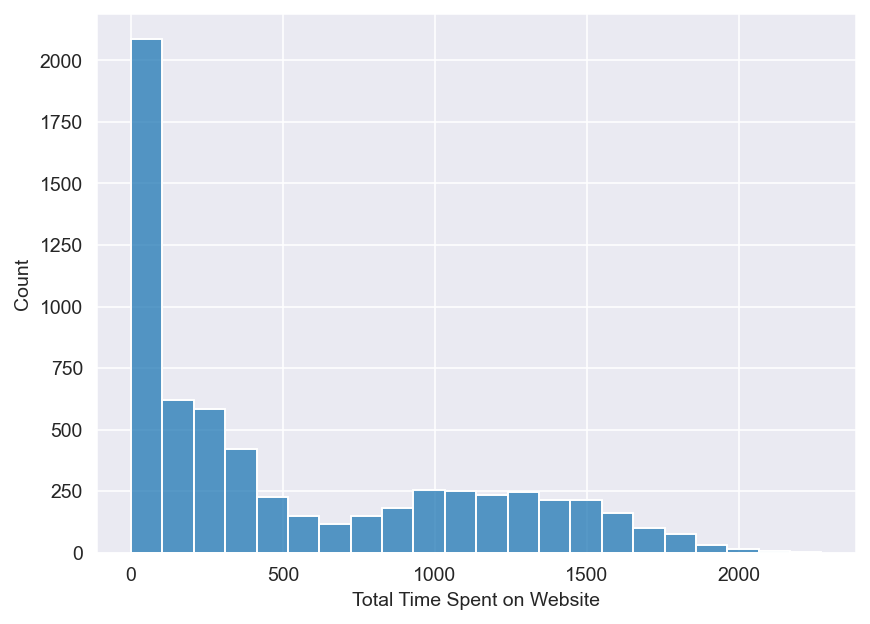

In [470]:
hist("Total Time Spent on Website")

Column 10: "Page Views per visit"

In [471]:
df["Page Views Per Visit"].describe()

count    6338.000000
mean        2.452005
std         2.042793
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        16.000000
Name: Page Views Per Visit, dtype: float64

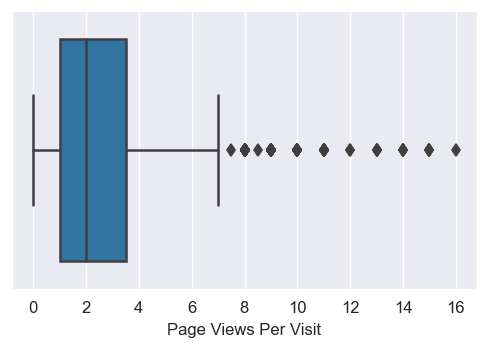

In [472]:
box_plot("Page Views Per Visit")

We can see from the above plot that there are outliers. Hence, we need to remove them

In [473]:
Q3 = df["Page Views Per Visit"].quantile(0.99)
df = df[(df["Page Views Per Visit"] <= Q3)]

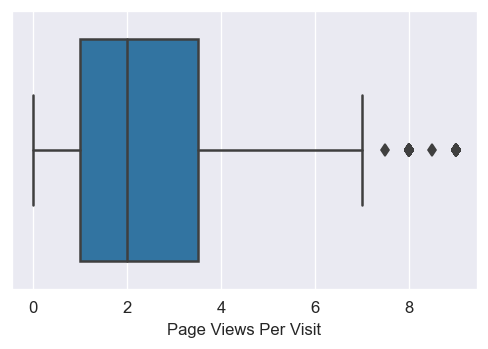

In [474]:
box_plot(x="Page Views Per Visit")

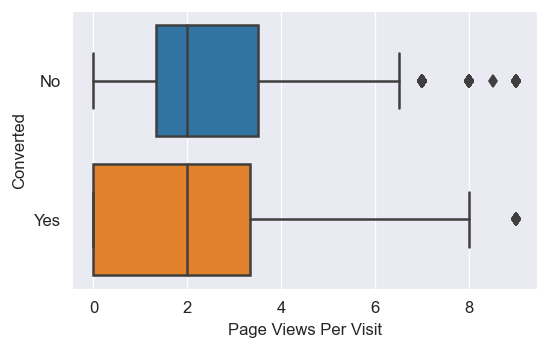

In [475]:
box_plot(x="Page Views Per Visit", y="Converted")

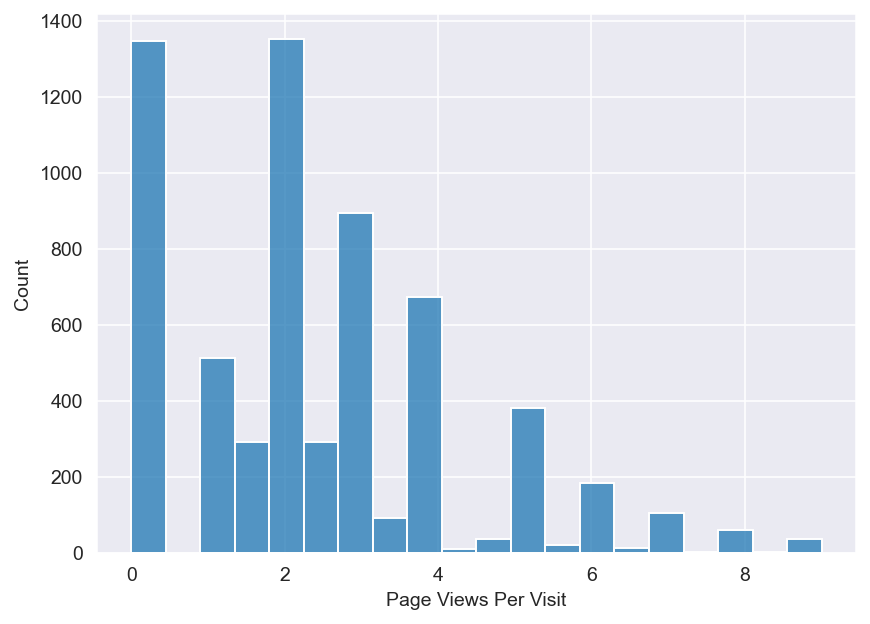

In [476]:
hist("Page Views Per Visit", bins=20)

Let's look at the had of the data frame again

In [477]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Modified
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Yes,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,Yes,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Modified


Column 11: "Last Activity"

In [478]:
df["Last Activity"].value_counts()

Last Activity
Email Opened                    2422
SMS Sent                        2164
Olark Chat Conversation          424
Page Visited on Website          405
Converted to Lead                296
Email Bounced                    181
Email Link Clicked               176
Form Submitted on Website         80
Unreachable                       69
Unsubscribed                      40
Had a Phone Conversation          22
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: count, dtype: int64

Converting the lower frequency values to "Others"

In [479]:
df["Last Activity"] = df["Last Activity"].replace(["View in browser link Clicked", "Approached upfront", "Email Received", "Email Marked Spam", "Visited Booth in Tradeshow"], "Others")

In [480]:
df["Last Activity"].value_counts()

Last Activity
Email Opened                 2422
SMS Sent                     2164
Olark Chat Conversation       424
Page Visited on Website       405
Converted to Lead             296
Email Bounced                 181
Email Link Clicked            176
Form Submitted on Website      80
Unreachable                    69
Unsubscribed                   40
Had a Phone Conversation       22
Others                         14
Name: count, dtype: int64

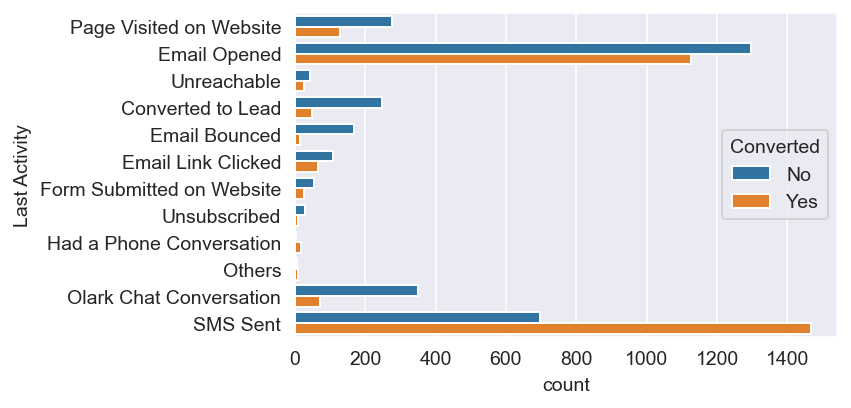

In [481]:
count_plot(x="Last Activity", hue="Converted")

Observation
From the above plot we can observe that:
1) The Conversion rate for the last activity of 'SMS Sent' is ~63%.
2) The Highest last activity of leads is 'Email Opened.'

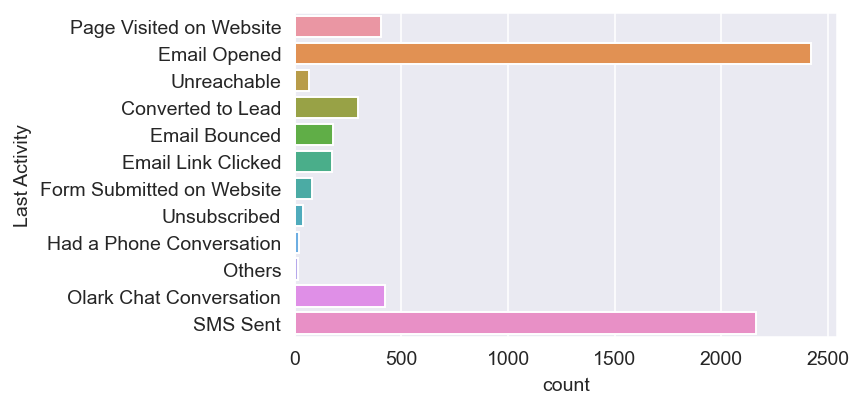

In [482]:
count_plot(x="Last Activity")

From the above plot we can observe that "Email Opened" brings in more number of leads than "SMS Sent."

Column 12: "Specialization"

In [483]:
df["Specialization"].value_counts()

Specialization
Not Specified                        1846
Finance Management                    732
Marketing Management                  658
Human Resource Management             654
Operations Management                 387
Business Administration               304
IT Projects Management                273
Supply Chain Management               268
Banking, Investment And Insurance     260
Media and Advertising                 156
Travel and Tourism                    142
International Business                133
Healthcare Management                 118
Hospitality Management                 87
E-COMMERCE                             78
Retail Management                      76
Rural and Agribusiness                 55
E-Business                             42
Services Excellence                    24
Name: count, dtype: int64

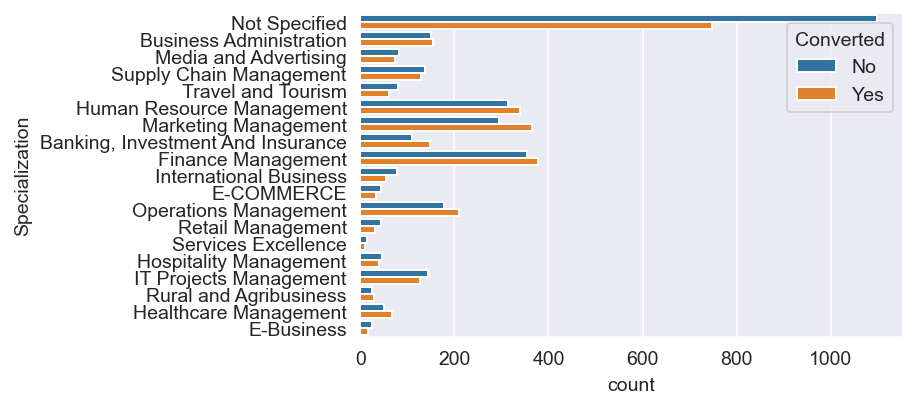

In [484]:
count_plot(x="Specialization", hue="Converted")

Observation
We can observe from the above count plot of 'Specialization' that 'Management' specialization altogether has more number of leads generating.And "Not Specified" category is also generating more number of leads.

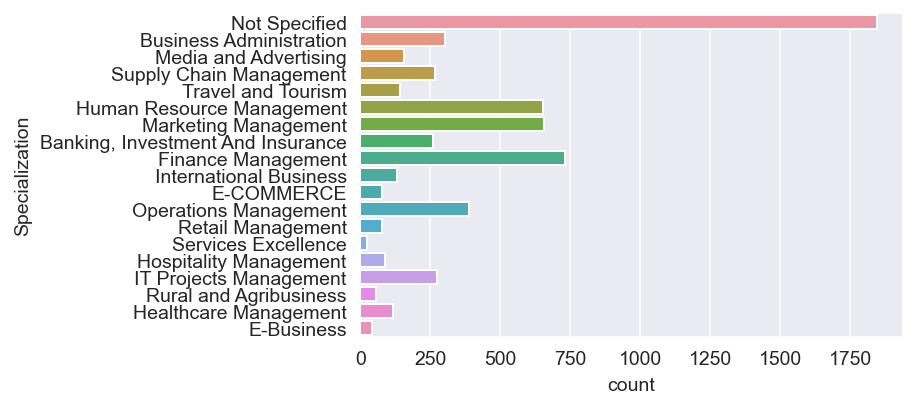

In [485]:
count_plot(x="Specialization")

Column 13: "What is your current occupation"

In [486]:
df["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5394
Working Professional     666
Student                  203
Other                     14
Housewife                  9
Businessman                7
Name: count, dtype: int64

Replacing the low frequencies to "Others"

In [487]:
df["What is your current occupation"] = df["What is your current occupation"].replace(["Housewife", "Businessman"], "Other")

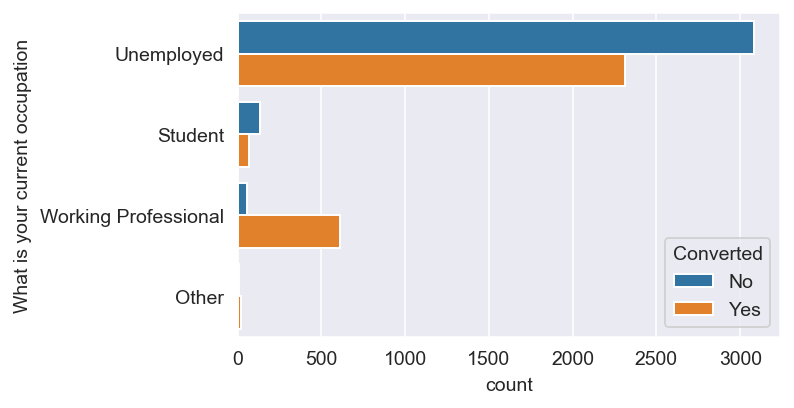

In [488]:
count_plot(x="What is your current occupation", hue="Converted")

Observation
'Unemployed' leads are generationg more number of leads and having ~45% conversion rate.
The Conversion rate is higher for 'Working Professionals'.

Let's look at the data frame again

In [489]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Modified
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Yes,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,Yes,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Modified


Column 14: "A free copy of Mastering The Interview"

In [490]:
df["A free copy of Mastering The Interview"].value_counts()

A free copy of Mastering The Interview
No     4181
Yes    2112
Name: count, dtype: int64

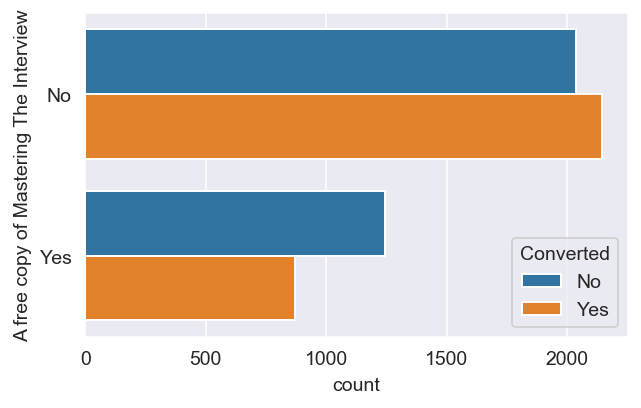

In [491]:
count_plot(x="A free copy of Mastering The Interview", hue="Converted")

Column 15: "Last Notable Activity"

In [492]:
df["Last Notable Activity"].value_counts()

Last Notable Activity
Email Opened                    2010
Modified                        1940
SMS Sent                        1846
Page Visited on Website          196
Email Link Clicked               108
Olark Chat Conversation           75
Email Bounced                     49
Unsubscribed                      30
Unreachable                       22
Had a Phone Conversation          12
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: count, dtype: int64

This is a redundant column hence we drop this column also

In [493]:
df.drop(labels="Last Notable Activity", axis=1, inplace=True)

Converting the "Converted" column back into a numerical Column. Plus also "Do Not Email" and "A free copy of Mastering The Interview."

In [494]:
df["Converted"] = df["Converted"].map({"Yes": 1, "No": 0})
df["Do Not Email"] = df["Do Not Email"].map({"Yes": 1, "No": 0})
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].map({"Yes": 1, "No": 0})

##### Heatmap to understand the attributes of correlation: -

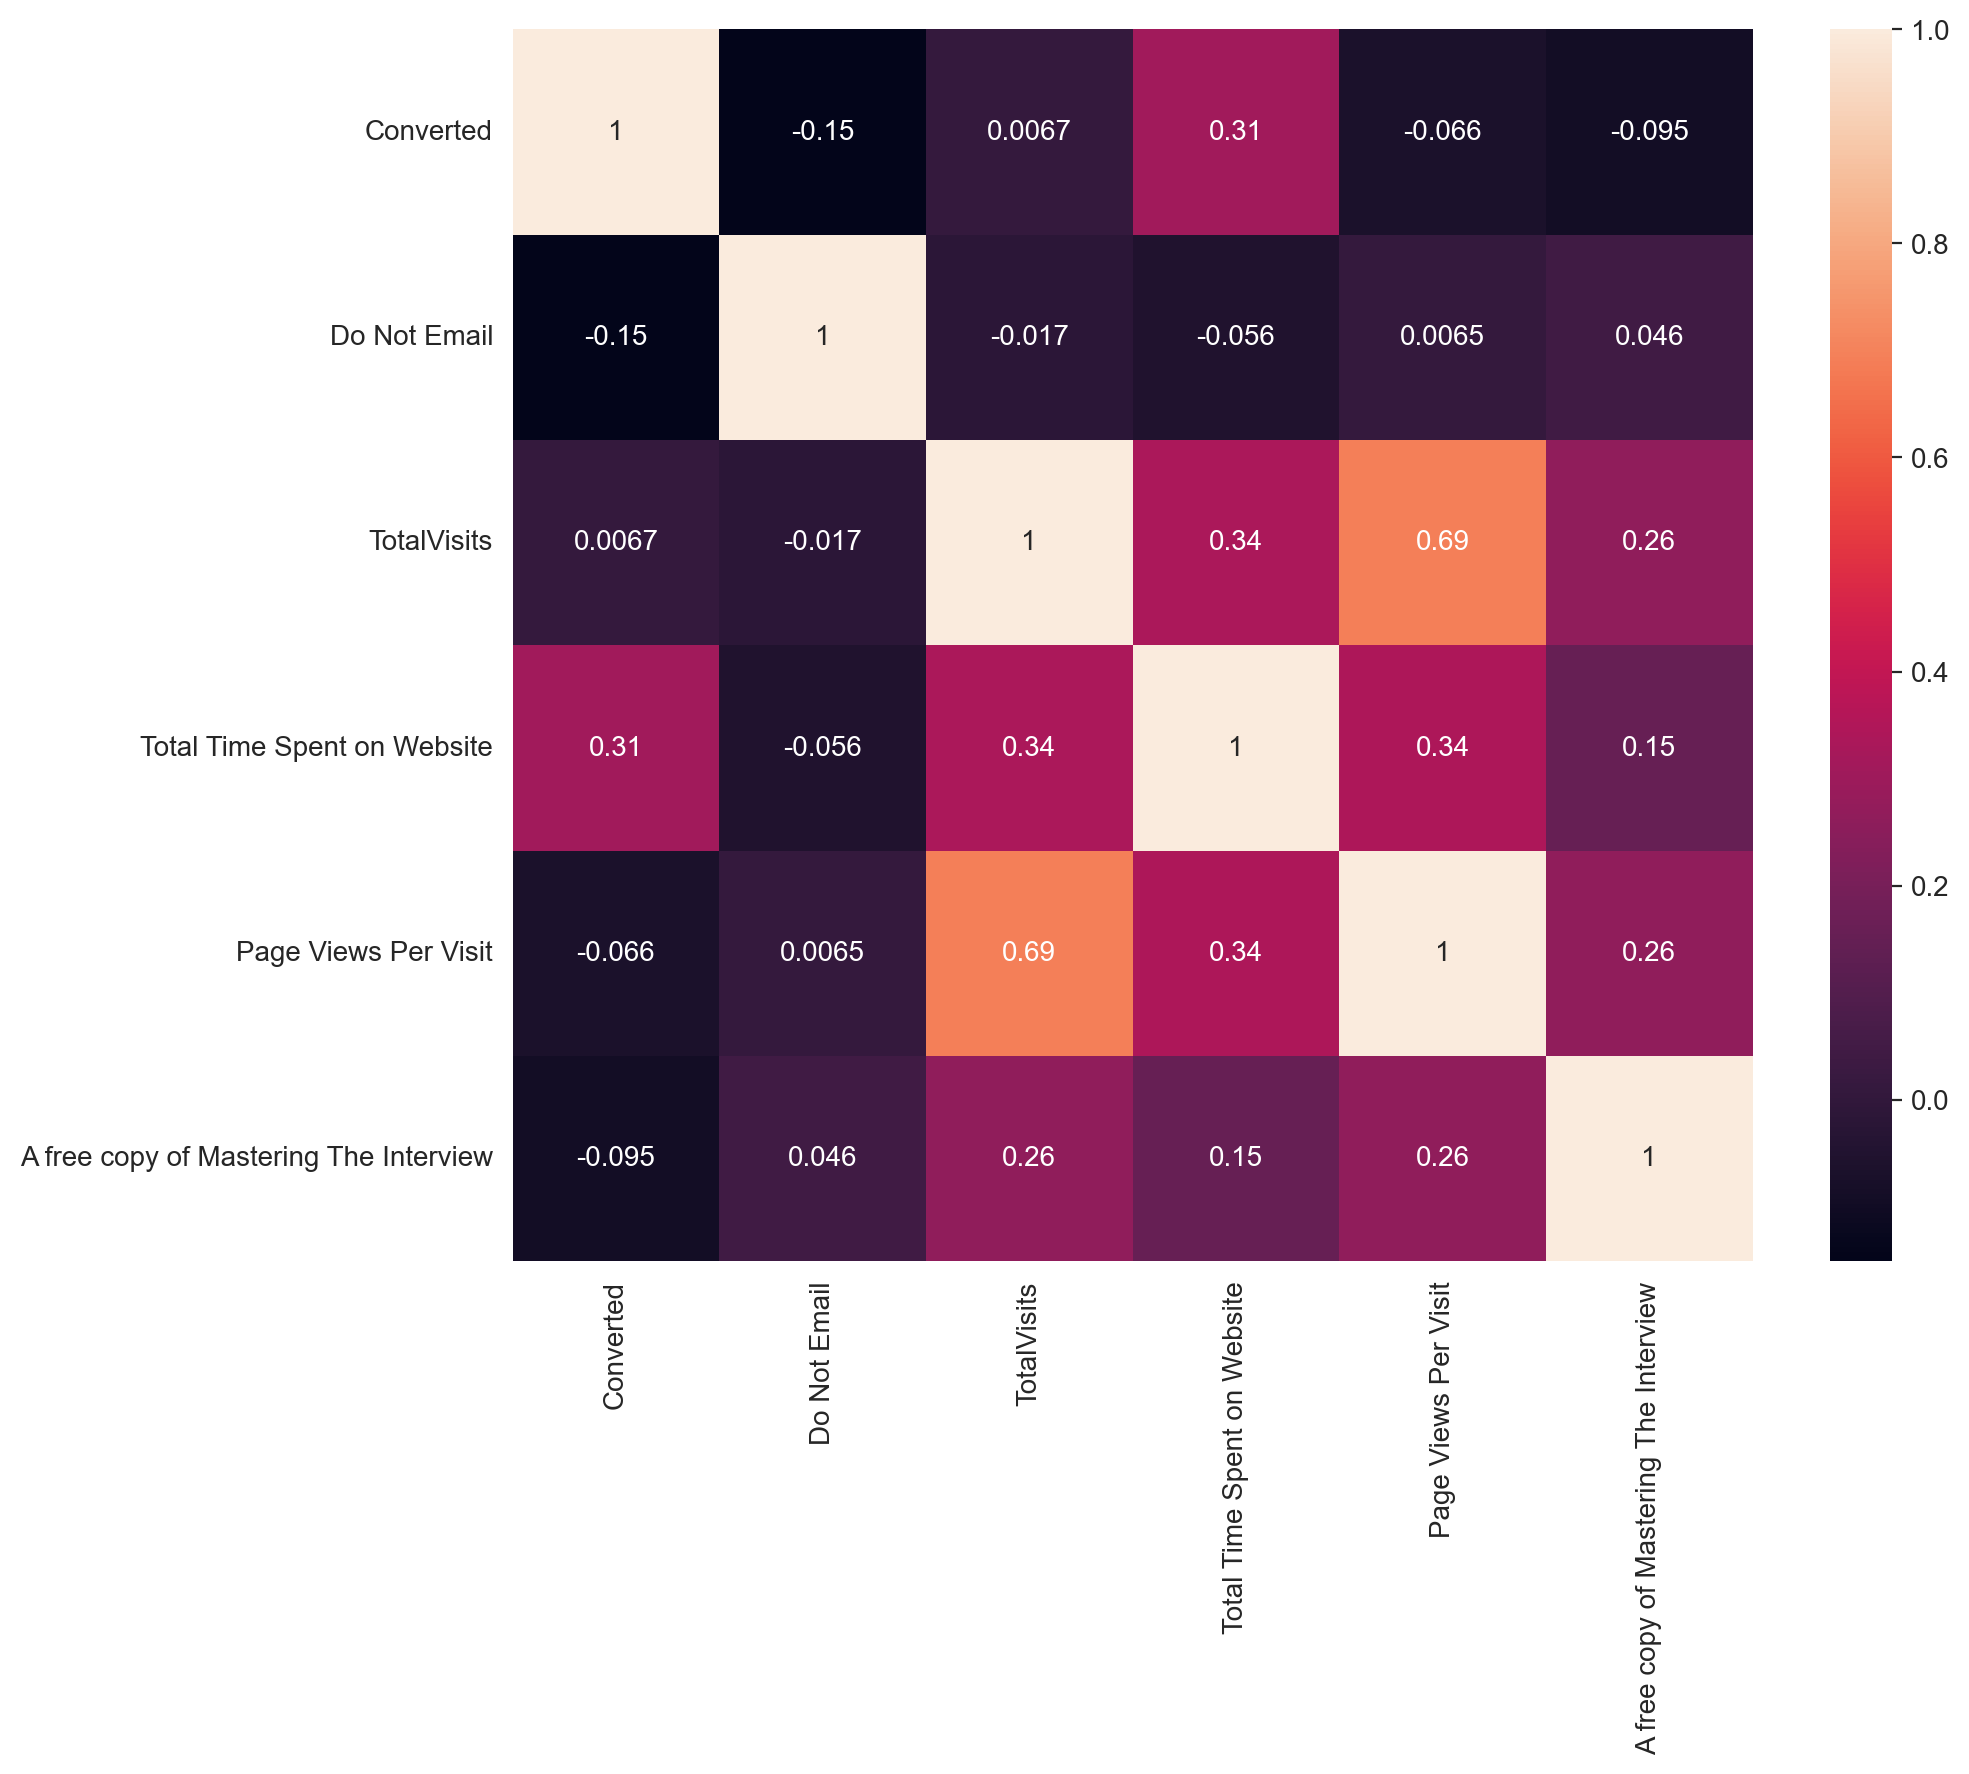

In [495]:
plt.figure(figsize=(10, 8), dpi=200)
sns.heatmap(data=df[["Converted", "Do Not Email", "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit", "A free copy of Mastering The Interview"]].corr(), annot=True)
plt.show()

Observation
1) 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .69
2) 'Total Time Spent on Website' has a correlation of 0.31 with target variable 'Converted.'

## Data Preparation
#### Creating Dummies for Categorical Columns

In [496]:
dummy = pd.get_dummies(data=df[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True, dtype=int)
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding the dummy dataframe to the original data frame

In [497]:
df = pd.concat([df, dummy], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0


Dropping the Categorical columns

In [498]:
df.drop(labels=["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation"], axis=1, inplace=True)

Inspecting the data frame

In [499]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6293 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6293 non-null   int64  
 1   Converted                                             6293 non-null   int64  
 2   TotalVisits                                           6293 non-null   float64
 3   Total Time Spent on Website                           6293 non-null   int64  
 4   Page Views Per Visit                                  6293 non-null   float64
 5   A free copy of Mastering The Interview                6293 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6293 non-null   int64  
 7   Lead Origin_Lead Add Form                             6293 non-null   int64  
 8   Lead Origin_Lead Import                               6293 non-

In [501]:
df.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,...,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000
mean,0.068330,0.478945,3.329414,531.803750,2.386590,0.335611,0.566979,0.092166,0.004290,0.004449,...,0.021135,0.104561,0.024789,0.293342,0.061497,0.012077,0.008740,0.003814,0.042587,0.022565
std,0.252331,0.499596,2.996717,564.629981,1.891391,0.472241,0.495533,0.289283,0.065366,0.066560,...,0.143844,0.306011,0.155495,0.455330,0.240259,0.109238,0.093085,0.061643,0.201940,0.148523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,282.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,5.000000,1019.000000,3.500000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,18.000000,2272.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [502]:
df.shape

(6293, 49)

## Train—Test Split

In [503]:
X = df.drop(labels="Converted", axis=1)
y = df["Converted"]

Inspecting X and y

In [504]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [505]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [507]:
X_train.shape

(4405, 48)

In [508]:
X_test.shape

(1888, 48)

#### Feature Scaling    

We are using a standard scaler here

In [509]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
6993,0,-0.441625,-0.301869,-0.206503,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6195,1,0.226539,-0.502908,0.839120,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6667,0,-0.775707,2.059006,-0.729314,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4514,0,0.226539,-0.431743,0.839120,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1609,0,1.228784,1.374050,0.577714,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [510]:
# Making an object of LogisticRegression
logreg = LogisticRegression()

In [511]:
# Using the RFE Method from sklearn
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [512]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 7),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 4),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Vi

In [513]:
col = X_train.columns[rfe.support_]

Let's build a model using statsmodels using only these columns as selected by RFE

In [514]:
X_train = X_train[col]

In [515]:
X_train_sm = sm.add_constant(X_train)
logmodel1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logmodel1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4405
Model:                            GLM   Df Residuals:                     4384
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1995.6
Date:                Sun, 07 Jan 2024   Deviance:                       3991.2
Time:                        10:25:21   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3802
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Let's look at the VIF's

In [516]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,13.30
2,Lead Origin_Landing Page Submission,6.72
7,Last Activity_Email Opened,3.36
18,Specialization_Not Specified,3.29
11,Last Activity_SMS Sent,3.09
16,What is your current occupation_Working Profes...,2.36
3,Lead Origin_Lead Add Form,2.22
5,Lead Source_Olark Chat,1.96
9,Last Activity_Olark Chat Conversation,1.56
14,What is your current occupation_Student,1.55


 VIF should be < 5
 we could have :— 
    High cases: high p value and high vif
    high-low cases: high p value and low vif # remove these first
                   or low p value and high vif # remove these after the one above
low cases: low p and low vif

From the above vif's we can see that only 2 variables have a variance inflation factor more than 5, "What is your current occupation_Unemployed" and "Lead Origin_Landing Page Submission." Let's Remove "What is your current occupation_Unemployed" as it has high VIF and P value.

In [517]:
X_train.drop(labels="What is your current occupation_Unemployed", axis=1, inplace=True)

Rebuilding the Model After removing "What is your current occupation_Unemployed" variable

In [518]:
X_train_sm = sm.add_constant(X_train)
logmodel2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res1 = logmodel2.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4405
Model:                            GLM   Df Residuals:                     4385
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1996.7
Date:                Sun, 07 Jan 2024   Deviance:                       3993.3
Time:                        10:25:22   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3799
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Let's look at the vif's

In [519]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.92
7,Last Activity_Email Opened,2.49
11,Last Activity_SMS Sent,2.41
17,Specialization_Not Specified,2.14
3,Lead Origin_Lead Add Form,1.88
5,Lead Source_Olark Chat,1.81
9,Last Activity_Olark Chat Conversation,1.41
6,Lead Source_Welingak Website,1.38
1,Total Time Spent on Website,1.30
15,What is your current occupation_Working Profes...,1.23


We can see that all the VIF's are less than 5. So let's drop the variables that have high P-values, beginning with "What is your current occupation_Student"

In [520]:
X_train.drop(labels="What is your current occupation_Student", axis=1, inplace=True)

Rebuilding the Model

In [521]:
X_train_sm = sm.add_constant(X_train)
logmodel3 = sm.GLS(y_train, X_train_sm, family=sm.families.Binomial())
print(logmodel3.fit().summary())

                            GLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.386
Model:                            GLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:25:22   Log-Likelihood:                -2120.4
No. Observations:                4405   AIC:                             4279.
Df Residuals:                    4386   BIC:                             4400.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Looking at VIFs

In [522]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.90
7,Last Activity_Email Opened,2.49
11,Last Activity_SMS Sent,2.40
16,Specialization_Not Specified,2.12
3,Lead Origin_Lead Add Form,1.87
5,Lead Source_Olark Chat,1.81
9,Last Activity_Olark Chat Conversation,1.40
6,Lead Source_Welingak Website,1.38
1,Total Time Spent on Website,1.30
14,What is your current occupation_Working Profes...,1.23


We see that the vif are still all below 5. Let's Drop "Specialization_Hospitality Management" as it has high p-value.

In [523]:
X_train.drop(labels="Specialization_Hospitality Management", axis=1, inplace=True)

Let's Rebuild the model

In [524]:
logmodel4 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
print(logmodel4.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4405
Model:                            GLM   Df Residuals:                     4387
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1998.5
Date:                Sun, 07 Jan 2024   Deviance:                       3997.1
Time:                        10:25:23   Pearson chi2:                 4.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Let's see the vifs

In [525]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.88
7,Last Activity_Email Opened,2.49
11,Last Activity_SMS Sent,2.40
15,Specialization_Not Specified,2.12
3,Lead Origin_Lead Add Form,1.87
5,Lead Source_Olark Chat,1.81
9,Last Activity_Olark Chat Conversation,1.40
6,Lead Source_Welingak Website,1.38
1,Total Time Spent on Website,1.30
0,Do Not Email,1.23


Let's Drop the "Specialization_Retail Management" column

In [526]:
X_train.drop(labels="Specialization_Retail Management", axis=1, inplace=True)

Let's Rebuild the model

In [527]:
logmodel5 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
print(logmodel5.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4405
Model:                            GLM   Df Residuals:                     4388
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1999.2
Date:                Sun, 07 Jan 2024   Deviance:                       3998.3
Time:                        10:25:23   Pearson chi2:                 4.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3792
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIFs

In [528]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.87
7,Last Activity_Email Opened,2.49
11,Last Activity_SMS Sent,2.40
15,Specialization_Not Specified,2.12
3,Lead Origin_Lead Add Form,1.87
5,Lead Source_Olark Chat,1.81
9,Last Activity_Olark Chat Conversation,1.40
6,Lead Source_Welingak Website,1.38
1,Total Time Spent on Website,1.30
0,Do Not Email,1.23


Let's drop the "Last Activity_Unsubscribed" variable

In [529]:
X_train.drop(labels="Last Activity_Unsubscribed", axis=1, inplace=True)

In [530]:
logmodel6 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
print(logmodel6.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4405
Model:                            GLM   Df Residuals:                     4389
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2000.3
Date:                Sun, 07 Jan 2024   Deviance:                       4000.6
Time:                        10:25:24   Pearson chi2:                 4.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3789
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

The VIFs

In [531]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.86
7,Last Activity_Email Opened,2.48
11,Last Activity_SMS Sent,2.39
14,Specialization_Not Specified,2.12
3,Lead Origin_Lead Add Form,1.86
5,Lead Source_Olark Chat,1.81
9,Last Activity_Olark Chat Conversation,1.40
6,Lead Source_Welingak Website,1.38
1,Total Time Spent on Website,1.30
13,What is your current occupation_Working Profes...,1.23


Let's drop "Lead Origin_Lead Import" as it has high p-value

In [532]:
X_train.drop(labels="Lead Origin_Lead Import", axis=1, inplace=True)

Rebuilding the model

In [533]:
logmodel7 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
print(logmodel7.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4405
Model:                            GLM   Df Residuals:                     4390
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.6
Date:                Sun, 07 Jan 2024   Deviance:                       4003.1
Time:                        10:25:25   Pearson chi2:                 4.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3786
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Let's Look at the VIFs

In [534]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.83
6,Last Activity_Email Opened,2.45
10,Last Activity_SMS Sent,2.37
13,Specialization_Not Specified,2.12
3,Lead Origin_Lead Add Form,1.85
4,Lead Source_Olark Chat,1.79
8,Last Activity_Olark Chat Conversation,1.40
5,Lead Source_Welingak Website,1.38
1,Total Time Spent on Website,1.29
12,What is your current occupation_Working Profes...,1.23


Let's drop "Last Activity_Others" as it has high p-value

In [535]:
X_train.drop(labels="Last Activity_Others", axis=1, inplace=True)

Rebuilding the Model

In [536]:
logmodel8 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
res3 = logmodel8.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4405
Model:                            GLM   Df Residuals:                     4391
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2003.4
Date:                Sun, 07 Jan 2024   Deviance:                       4006.9
Time:                        10:25:25   Pearson chi2:                 4.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3780
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Looking ate the VIFs

In [537]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
6,Last Activity_Email Opened,2.43
9,Last Activity_SMS Sent,2.36
12,Specialization_Not Specified,2.11
3,Lead Origin_Lead Add Form,1.85
4,Lead Source_Olark Chat,1.79
8,Last Activity_Olark Chat Conversation,1.40
5,Lead Source_Welingak Website,1.38
1,Total Time Spent on Website,1.29
11,What is your current occupation_Working Profes...,1.23


The "res3" Model is ready to go. The Important variables used in this model are: ["Lead Origin_Landing Page Submission", "Last Activity_Email Opened," "Last Activity_SMS Sent", "Specialization_Not Specified", "Lead Origin_Lead Add Form", "Lead Source_Olark Chat", "Last Activity_Olark Chat Conversation", "Lead Source_Welingak Website," "Total Time Spent on Website, "What is your current occupation_Working Professional," "Do Not Email," "Last Activity_Unreachable," "Last Activity_Had a Phone Conversation"]

We are good to go.

## Model Evaluation

Now as both the p-values and the vifs are all decent we can make predictions on the test set. But before that we need to scale the test set also

Use 'predict' to predict the probabilities on the train set

In [538]:
y_train_pred = res3.predict(sm.add_constant(X_train))
y_train_pred[:10]

6993    0.450597
6195    0.034422
6667    0.938662
4514    0.195836
1609    0.651804
7021    0.960923
7059    0.733683
5289    0.022885
8163    0.684173
1490    0.968712
dtype: float64

Reshaping it into an array

In [539]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45059732, 0.03442202, 0.938662  , 0.19583589, 0.6518042 ,
       0.96092287, 0.73368298, 0.02288539, 0.68417308, 0.96871181])

In [540]:
y_train_pred_final = pd.DataFrame({"Converted": y_train.values, "Conversion_prob": y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_prob
0,0,0.450597
1,0,0.034422
2,0,0.938662
3,0,0.195836
4,1,0.651804


Creating a new column "Predicted" with value 1 if Conversion_prob > 0.5 else 0

In [541]:
y_train_pred_final["Predicted"] = y_train_pred_final["Conversion_prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.450597,0
1,0,0.034422,0
2,0,0.938662,1
3,0,0.195836,0
4,1,0.651804,1


Now let's evaluate the model

Creating confusion matrix

In [542]:
confusion = metrics.confusion_matrix(y_true=y_train_pred_final["Converted"], y_pred=y_train_pred_final["Predicted"])
confusion

array([[1919,  377],
       [ 524, 1585]])

Let's check the overall accuracy

In [543]:
accuracy = metrics.accuracy_score(y_true=y_train_pred_final["Converted"], y_pred=y_train_pred_final["Predicted"])
accuracy

0.7954597048808173

Let's evaluate the other metrics as well such as "sensitivity," "Specificity"

In [544]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

Sensitivity

In [545]:
sensitivity = TP/(TP + FN)
sensitivity

0.7515410146989094

Specificity

In [546]:
specificity = TN/(TN + FP)
specificity

0.835801393728223

### Finding the Optimal Cutoff

Let's plot an ROC curve to see what AUC we get.

In [547]:
def draw_roc(actual, predicted):
    fpr, tpr, threshold = metrics.roc_curve(actual, predicted, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, predicted)
    plt.figure(figsize=(5, 5), dpi=120)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [548]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Conversion_prob"], drop_intermediate = False )

Calling the ROC Function

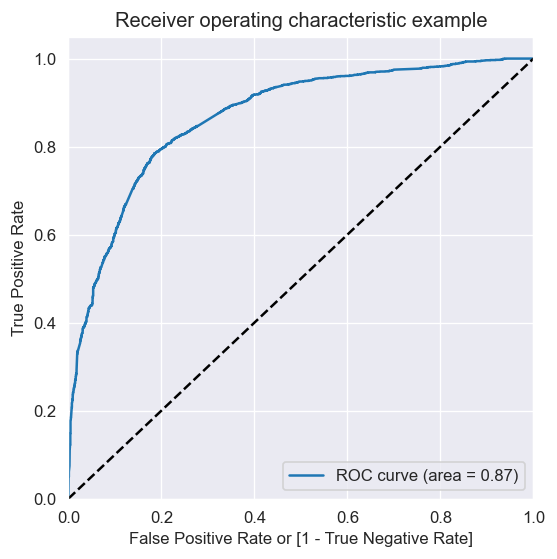

In [549]:
draw_roc(actual=y_train_pred_final["Converted"], predicted=y_train_pred_final["Conversion_prob"])

The area under the curve of the ROC is 0.86, which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

Let's create columns with different probability cutoffs 

In [550]:
numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final["Conversion_prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.450597,0,1,1,1,1,1,0,0,0,0,0
1,0,0.034422,0,1,0,0,0,0,0,0,0,0,0
2,0,0.938662,1,1,1,1,1,1,1,1,1,1,1
3,0,0.195836,0,1,1,0,0,0,0,0,0,0,0
4,1,0.651804,1,1,1,1,1,1,1,1,0,0,0


Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

In [551]:
cutoff_df = pd.DataFrame(columns=["Probability", "Accuracy", "Sensitivity", "Specificity"])
for i in numbers:
    cm = metrics.confusion_matrix(y_true=y_train_pred_final["Converted"], y_pred=y_train_pred_final[i])
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.478774,1.000000,0.000000
0.1,0.1,0.560272,0.988146,0.167247
0.2,0.2,0.716686,0.946420,0.505662
0.3,0.3,0.759818,0.898056,0.632840
0.4,0.4,0.793871,0.810337,0.778746
0.5,0.5,0.795460,0.751541,0.835801
0.6,0.6,0.773439,0.655761,0.881533
0.7,0.7,0.745743,0.561404,0.915070
0.8,0.8,0.713507,0.458985,0.947300
0.9,0.9,0.645630,0.277383,0.983885


Let's plot this as well

<Figure size 1400x1000 with 0 Axes>

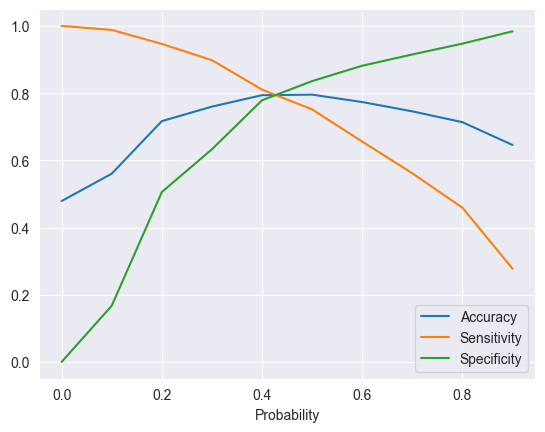

In [552]:
plt.figure(figsize=(7, 5), dpi=200)
cutoff_df.plot.line(x="Probability", y=["Accuracy", "Sensitivity", "Specificity"])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [553]:
y_train_pred_final["Final_Predicted"] = y_train_pred_final["Conversion_prob"].map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.450597,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.034422,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.938662,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.195836,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.651804,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,0,0.476762,0,1,1,1,1,1,0,0,0,0,0,1
4401,0,0.216982,0,1,1,1,0,0,0,0,0,0,0,0
4402,0,0.319491,0,1,1,1,1,0,0,0,0,0,0,0
4403,0,0.218612,0,1,1,1,0,0,0,0,0,0,0,0


Let's check the accuracy score now

In [554]:
accuracy = metrics.accuracy_score(y_true=y_train_pred_final["Converted"], y_pred=y_train_pred_final["Final_Predicted"])
accuracy

0.7963677639046538

Let's create the confusion matrix again

In [555]:
confusion2 = metrics.confusion_matrix(y_true=y_train_pred_final["Converted"], y_pred=y_train_pred_final["Final_Predicted"])
confusion2

array([[1823,  473],
       [ 424, 1685]])

In [556]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Let's evaluate other metrics as well

Sensitivity

In [557]:
TP/(TP+FN)

0.7989568515884305

Specificity

In [558]:
TN/(TN+FP)

0.7939895470383276

The cutoff point seems good to go

## Making Predictions on the Test set

Applying Transform on the Test set

In [559]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

Select the columns in X_train for X_test as well

In [560]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Hospitality Management,Specialization_Not Specified,Specialization_Retail Management
1771,0,0.874121,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3149,0,-0.506466,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7047,0,1.100067,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2285,0,-0.942347,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
7318,1,-0.913881,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


Adding a constant to X_test

In [561]:
X_test_sm = sm.add_constant(X_test[col])
X_train_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Specialization_Hospitality Management,Specialization_Not Specified,Specialization_Retail Management
6993,1.0,0,-0.301869,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6195,1.0,1,-0.502908,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6667,1.0,0,2.059006,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4514,1.0,0,-0.431743,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1609,1.0,0,1.374050,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Drop the required columns from X_test as well

In [562]:
test_drop_lst = ["What is your current occupation_Unemployed", "What is your current occupation_Student", "Specialization_Hospitality Management", "Specialization_Retail Management", "Last Activity_Unsubscribed", "Lead Origin_Lead Import", "Last Activity_Others"]
X_test = X_test.drop(labels=test_drop_lst, axis=1)

In [563]:
y_test_pred = res3.predict(sm.add_constant(X_test))

In [564]:
y_test_pred[:10]

1771    0.755826
3149    0.374025
7047    0.799812
2285    0.914220
7318    0.097775
6269    0.970945
6027    0.228356
6153    0.340059
4035    0.075699
9228    0.947793
dtype: float64

Converting y_test_pred into a Data Frame

In [565]:
y_test_1 = pd.DataFrame(y_test_pred)

In [566]:
y_test_1[:10]

,0
1771,0.755826
3149,0.374025
7047,0.799812
2285,0.914220
7318,0.097775
6269,0.970945
6027,0.228356
6153,0.340059
4035,0.075699
9228,0.947793


Converting y_test into a dataframe

In [567]:
y_test_df = pd.DataFrame(y_test)

In [568]:
y_test_df[:10]

,Converted
1771,1
3149,1
7047,0
2285,1
7318,0
6269,1
6027,0
6153,0
4035,0
9228,1


Resetting the index of "y_test_1" and "y_test_df" to concat them.

In [569]:
y_test_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [570]:
y_pred_final = pd.concat([y_test_df, y_test_1], axis=1)
y_pred_final.head()

,Converted,0
0,1,0.755826
1,1,0.374025
2,0,0.799812
3,1,0.914220
4,0,0.097775


Renaming the Column

In [571]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [572]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.755826
1,1,0.374025
2,0,0.799812
3,1,0.914220
4,0,0.097775


Making predictions on the test set using a cutoff of 0.42

In [573]:
y_pred_final["final_rediction"] = y_pred_final["Conversion_Prob"].map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_rediction
0,1,0.755826,1
1,1,0.374025,0
2,0,0.799812,1
3,1,0.914220,1
4,0,0.097775,0


Let's check the accuracy score

In [574]:
test_accuracy = metrics.accuracy_score(y_true=y_pred_final["Converted"], y_pred=y_pred_final["final_rediction"])
test_accuracy

0.7838983050847458

In [575]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final["final_rediction"])
confusion2

array([[749, 234],
       [174, 731]])

In [576]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

Calculation sensitivity

In [577]:
TP / float(TP + FN)

0.8077348066298342

Calculating specificity

In [578]:
TN / float(TN+FP)

0.7619532044760936

### Precision Recall View

Let's look at confusion matrix again

In [579]:
confusion = metrics.confusion_matrix(y_true=y_train_pred_final["Converted"], y_pred=y_train_pred_final["Final_Predicted"])
confusion

array([[1823,  473],
       [ 424, 1685]])

Precision

In [580]:
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [581]:
TP / (TP + FP)

0.7808155699721965

Recall

In [582]:
TP / (TP + FN)

0.7989568515884305

Precision Recall Tradeoff

In [583]:
precision, recall, threshold = metrics.precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Conversion_prob"])

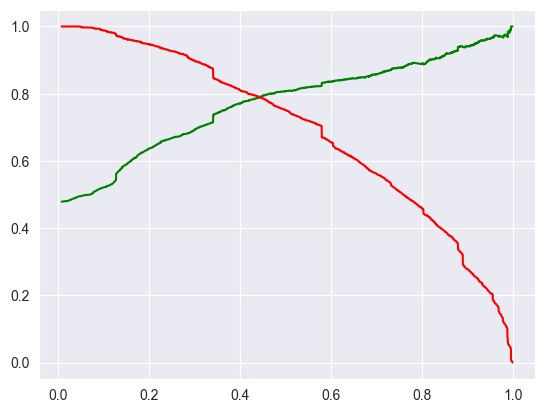

In [584]:
plt.plot(threshold, precision[:-1], "g-")
plt.plot(threshold, recall[:-1], "r-")
plt.show()

In [585]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Conversion_prob"].map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,final_predicted
0,0,0.450597,0,1,1,1,1,1,0,0,0,0,0,1,1
1,0,0.034422,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.938662,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.195836,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0.651804,1,1,1,1,1,1,1,1,0,0,0,1,1


Let's check the accuracy score now

In [586]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7986379114642451

Let's create the confusion matrix once again

In [587]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1848,  448],
       [ 439, 1670]])

In [588]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Calculation of Precision

In [589]:
TP/(TP+FP)

0.7884796978281398

Calculating Recall

In [590]:
TP/(TP+FN)

0.7918444760550024

The cut-off seems good to go

### Making predictions on the Test set

Making predictions on the test set and store it in the variable 'y_test_pred'

In [591]:
y_test_pred = res3.predict(sm.add_constant(X_test))

In [592]:
y_test_pred[:10]

1771    0.755826
3149    0.374025
7047    0.799812
2285    0.914220
7318    0.097775
6269    0.970945
6027    0.228356
6153    0.340059
4035    0.075699
9228    0.947793
dtype: float64

Converting y_pred to a dataframe

In [593]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1771,0.755826
3149,0.374025
7047,0.799812
2285,0.914220
7318,0.097775


converting y_test to DataFrame

In [594]:
y_test_df = pd.DataFrame(y_test)

Remove index for both dataframes to append them side by side 

In [595]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

Concatinating

In [596]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [597]:
y_pred_final.head()

,Converted,0
0,1,0.755826
1,1,0.374025
2,0,0.799812
3,1,0.914220
4,0,0.097775


Renaming the column

In [598]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [599]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.755826
1,1,0.374025
2,0,0.799812
3,1,0.914220
4,0,0.097775


Make predictions on the test set using 0.44 as the cutoff

In [600]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [601]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.755826,1
1,1,0.374025,0
2,0,0.799812,1
3,1,0.914220,1
4,0,0.097775,0


Now let's check the overall accuracy

In [602]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7876059322033898

In [603]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[764, 219],
       [182, 723]])

In [604]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Calculation Precision

In [605]:
TP/(TP+FP)

0.767515923566879

Calculating Recall

In [606]:
TP/(TP+FN)

0.7988950276243094